In [144]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
# 17 graficos
# cada query con sus 9 algoritmos (Tradicional y los mios)

In [197]:
alg_label = ["Traditional join", "Gradual LOUDS Backtracking", "Gradual LOUDS Optimal Order", 
                "Gradual DFUDS Backtracking", "Gradual DFUDS Optimal Order",
                "Ranked LOUDS Backtracking", "Ranked LOUDS Optimal Order",
                "Ranked DFUDS Backtracking", "Ranked DFUDS Optimal Order"]
queries_label = ["j3"]#,"j4","p2","p3","p4","s1","s2","s3","s4","t2","t3","t4","ti2","ti3","ti4","tr1","tr2"]

In [169]:
# box plots for each query
# TODO: make file j3... variable
# TDO hacer un for para cada query y función y tamaño k
data = [[],[],[],[],[],[],[],[],[]]
for type_fun in [0]:#,1]:
    for k in [1]:#,10,100,1000]: # TODO: maybe only k=1000 ? 
        for i,query in enumerate(queries_label): #[j3,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]:
            file = f"{query}-f{type_fun}-k{k}.txt"
            print(file)
            partialLoudsBack = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)
            partialLoudsNon = np.loadtxt(f'../partial/louds/nonFixedQueue/{file}', dtype=float)
            partialDfudsBack = np.loadtxt(f'../partial/dfuds/backtracking/{file}', dtype=float)
            partialDfudsNon = np.loadtxt(f'../partial/dfuds/nonFixedQueue/{file}', dtype=float)

            rankedLoudsBack = np.loadtxt(f'../partial/louds/backtracking/{file}', dtype=float)
            rankedLoudsNon = np.loadtxt(f'../partial/louds/nonFixedQueue/{file}', dtype=float)
            rankedDfudsBack = np.loadtxt(f'../partial/dfuds/backtracking/{file}', dtype=float)
            rankedDfudsNon = np.loadtxt(f'../partial/dfuds/nonFixedQueue/{file}', dtype=float)
            
            traditional = np.loadtxt(f'../all/{query}.txt',dtype=float)
                
            print(i)
            data[i] = [traditional, partialLoudsBack, partialLoudsNon, partialDfudsBack, partialDfudsNon, rankedLoudsBack, rankedLoudsNon, rankedDfudsBack, rankedDfudsNon]

j3-f0-k1.txt
0


In [170]:
data[0]

[array([3.53259e+00, 1.19374e+02, 6.30211e-01, 6.63229e-01, 7.85799e-01,
        9.09108e-01, 7.49159e+00, 1.09325e+00, 1.17381e+01, 1.85248e+01,
        2.12390e-02, 3.49564e+01, 7.20294e+00, 4.05295e-01, 3.27068e+00,
        1.91928e+00, 3.39546e+00, 2.04124e+02, 1.88116e+00, 6.15642e-01,
        1.02669e-01, 5.52305e+00, 9.26971e+00, 1.01528e+01, 5.43670e-01,
        1.01093e+00, 2.12627e+00, 5.39982e-01, 6.67862e+01, 4.05504e+00,
        1.88824e-01, 7.47943e+00, 8.15361e+01, 9.46010e-02, 1.00641e+00,
        2.86429e-01, 6.65497e-01, 7.19648e+00, 2.91659e+01, 2.31390e-02,
        3.45897e+00, 4.61424e-01, 6.84206e+00, 2.62010e+00, 2.68018e+00,
        1.28137e+02, 6.25170e-02, 5.56452e-01, 8.64247e+00, 1.96944e+00]),
 array([1.1e-05, 1.4e-05, 1.4e-05, 7.0e-06, 9.0e-06, 1.1e-05, 1.1e-05,
        8.0e-06, 1.2e-05, 1.2e-05, 8.0e-06, 1.1e-05, 1.1e-05, 1.6e-05,
        1.2e-05]),
 array(1.04804),
 array([1.5e-05, 1.9e-05, 1.6e-05, 1.1e-05, 1.2e-05, 1.2e-05, 1.4e-05,
        8.0e-06, 1.

In [166]:
# colors:
# https://matplotlib.org/stable/gallery/color/named_colors.html
colors = ['limegreen', 'mediumturquoise', 'yellow', 'coral', 'hotpink','royalblue','darkorange', 'greenyellow', 'darkviolet']

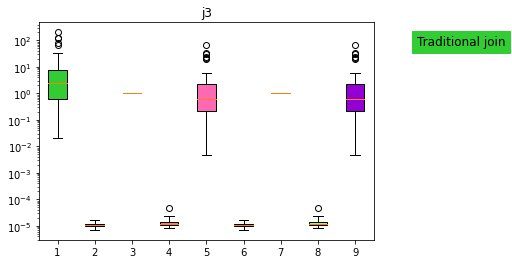

In [200]:
# TODO: esto hacerlo dentro del for
fig, j3 = plt.subplots(1,1)
#fig, (j3,j4,p2,p3,p4) = plt.subplots(1,5, sharey=True)
#fig, ((s1,s2,s3,s4,t2,t3),(t4,ti2,ti3,ti4,tr1,tr2)) = plt.subplots(2, 6, layout='constrained', sharey=True)
#j3.set_ylabel('Time (ms)')
#s1.set_ylabel('Time (ms)')
#t4.set_ylabel('Time (ms)')
plt.yscale('log')

pos_y = 0.8
for i,query in enumerate([j3]):#,j4,p2,p3,p4,s1,s2,s3,s4,t2,t3,t4,ti2,ti3,ti4,tr1,tr2]):
    fig.text(1,pos_y, alg_label[i], backgroundcolor=colors[0], color='black', weight='roman', size='large')
    pos_y -=0.05
    bplot = query.boxplot(data[i],whis=8,patch_artist=True);
    for patch, color in zip(bplot['boxes'], colors):
        patch.set_facecolor(color)
    plt.title(queries_label[i])
    
plt.show()
#bplotj3 = j3.boxplot(data_j3,whis=8,patch_artist=True, showmeans=True)  # will be used to label x-ticks
#bplotj3 = j4.boxplot(data_j4,whis=8,patch_artist=True)  # will be used to label x-ticks
#bplotp2 = p2.boxplot(data_p2,whis=8,patch_artist=True)  # will be used to label x-ticks
#bplotp3 = p3.boxplot(data_p3,whis=8,patch_artist=True)  # will be used to label x-ticks

# fill with colors
#for patch, color in zip(bplot1['boxes'], colors):
#    patch.set_facecolor(color)
#for patch, color in zip(bplot2['boxes'], colors):
#    patch.set_facecolor(color)
#for patch, color in zip(bplot3['boxes'], colors):
#    patch.set_facecolor(color)
#for patch, color in zip(bplot4['boxes'], colors):
#    patch.set_facecolor(color)

#plt.show()